In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
max_scores = {"Cell Cycle Transcription by Coupled CDK and Network Oscillators": 90,
              "Metabolic Interactions in the Gut Microbiome": 120,
              "Mammalian Cell Cycle 2006": 100,
              "T-LGL Survival Network 2011 Reduced Network": 180,
              "IL-1 Signaling": 1180,
              "Glucose Repression Signaling 2009": 730,
              "Signaling in Macrophage Activation": 3200,
              "Influenza A Virus Replication Cycle": 1310,
              "ABA_GA_base_A": 505}

In [3]:
df_raw = pd.read_csv("mix_log.csv")
df_raw["max"] = df_raw["sample_model"].apply(lambda x: max_scores[x])

df_raw.head()

,sample_model,iter,pop,keep,mix,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,Cell Cycle Transcription by Coupled CDK and Ne...,20,7,2,0,0.2,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,85.0,90
1,Cell Cycle Transcription by Coupled CDK and Ne...,20,7,2,0,0.2,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,87.0,90
2,Cell Cycle Transcription by Coupled CDK and Ne...,20,7,2,0,0.2,64.500,NaN,NaN,NaN,...,NaN,NaN,NaN,87.5,NaN,NaN,NaN,NaN,87.5,90
3,Cell Cycle Transcription by Coupled CDK and Ne...,20,7,2,0,0.2,20.000,NaN,NaN,NaN,...,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,86.0,90
4,Cell Cycle Transcription by Coupled CDK and Ne...,20,7,2,0,0.2,25.125,NaN,NaN,NaN,...,NaN,NaN,NaN,88.5,NaN,NaN,NaN,NaN,88.5,90


In [4]:
df_per = df_raw.groupby(["sample_model", "mix"]).mean().reset_index()
df_per.iloc[:,6:] = df_per.iloc[:,6:].div(df_per["max"], axis=0)

df_per.head()

,sample_model,mix,iter,pop,keep,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,ABA_GA_base_A,0,20.0,7.0,2.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.677616,NaN,NaN,NaN,NaN,0.678345,1.0
1,ABA_GA_base_A,1,20.0,7.0,2.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.668060,NaN,NaN,NaN,NaN,0.669217,1.0
2,ABA_GA_base_A,2,20.0,7.0,2.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.659595,NaN,NaN,NaN,NaN,0.660921,1.0
3,ABA_GA_base_A,3,20.0,7.0,2.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.653178,NaN,NaN,NaN,NaN,0.654246,1.0
4,ABA_GA_base_A,4,20.0,7.0,2.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.640942,NaN,NaN,NaN,NaN,0.642851,1.0


In [5]:
sample_models = ["Cell Cycle Transcription by Coupled CDK and Network Oscillators",
                 "Metabolic Interactions in the Gut Microbiome",
                 "Mammalian Cell Cycle 2006",
                 "T-LGL Survival Network 2011 Reduced Network",
                 "IL-1 Signaling",
                 "Glucose Repression Signaling 2009",
                 "Signaling in Macrophage Activation",
                 "Influenza A Virus Replication Cycle"]

samples = df_per.loc[df_per["sample_model"].isin(sample_models)]
aba = df_per.loc[df_per["sample_model"] == "ABA_GA_base_A"]

In [6]:
samples_iter = samples.drop(columns="sample_model").groupby("mix").mean().reset_index()
samples_iter.interpolate(axis=1, inplace=True)
samples_iter

,mix,iter,pop,keep,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,0.0,20.0,7.0,2.0,0.2,0.412975,0.445269,0.477563,0.509857,0.542151,...,0.840365,0.841005,0.841645,0.842286,0.842813,0.843341,0.843868,0.844396,0.844923,1.0
1,1.0,20.0,7.0,2.0,0.2,0.412975,0.445415,0.477854,0.510293,0.542732,...,0.855435,0.856313,0.857191,0.858069,0.858731,0.859392,0.860053,0.860714,0.861376,1.0
2,2.0,20.0,7.0,2.0,0.2,0.412975,0.445094,0.477212,0.509331,0.541449,...,0.836471,0.837006,0.837542,0.838078,0.839029,0.839980,0.840931,0.841882,0.842833,1.0
3,3.0,20.0,7.0,2.0,0.2,0.412975,0.447079,0.481182,0.515285,0.549388,...,0.820508,0.821472,0.822437,0.823401,0.823748,0.824095,0.824443,0.824790,0.825137,1.0
4,4.0,20.0,7.0,2.0,0.2,0.412975,0.448497,0.484018,0.519540,0.555061,...,0.777556,0.778171,0.778785,0.779400,0.780072,0.780744,0.781416,0.782089,0.782761,1.0
5,5.0,20.0,7.0,2.0,0.2,0.412975,0.448184,0.483392,0.518601,0.553809,...,0.640901,0.640901,0.640901,0.640901,0.640901,0.640901,0.640901,0.640901,0.640901,1.0


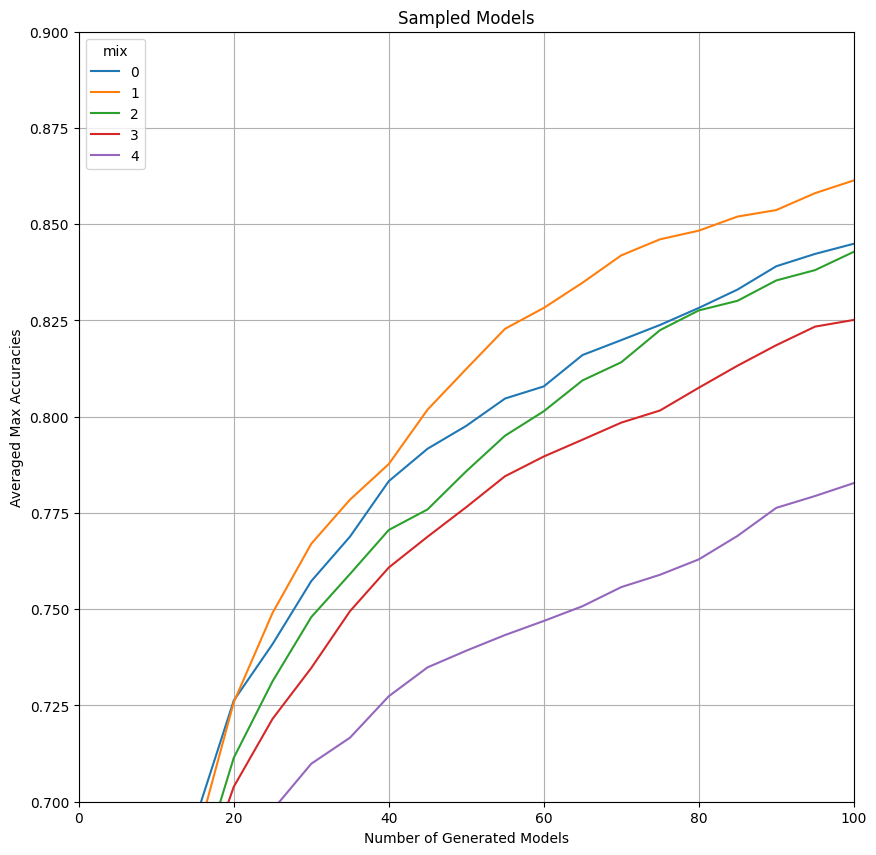

In [7]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), samples_iter.iloc[0,5:106], label="0", color = "C0")
ax1.plot(range(101), samples_iter.iloc[1,5:106], label="1", color = "C1")
ax1.plot(range(101), samples_iter.iloc[2,5:106], label="2", color = "C2")
ax1.plot(range(101), samples_iter.iloc[3,5:106], label="3", color = "C3")
ax1.plot(range(101), samples_iter.iloc[4,5:106], label="4", color = "C4")
# ax1.plot(range(101), samples_iter.iloc[5,5:106], label="5", color = "C5")

ax1.legend(title="mix", loc="upper left")
ax1.grid()
ax1.set_xlim(0, 100)
ax1.set_ylim(0.7, 0.9)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("Sampled Models")

plt.show()

In [8]:
aba_iter = aba.drop(columns="sample_model").groupby("mix").mean().reset_index()
aba_iter.interpolate(axis=1, inplace=True)
aba_iter

,mix,iter,pop,keep,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,0.0,20.0,7.0,2.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.675291,0.676066,0.676841,0.677616,0.677762,0.677908,0.678053,0.678199,0.678345,1.0
1,1.0,20.0,7.0,2.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.666579,0.667073,0.667566,0.668060,0.668291,0.668522,0.668754,0.668985,0.669217,1.0
2,2.0,20.0,7.0,2.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.658142,0.658626,0.659111,0.659595,0.659860,0.660125,0.660391,0.660656,0.660921,1.0
3,3.0,20.0,7.0,2.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.652369,0.652639,0.652909,0.653178,0.653392,0.653605,0.653819,0.654032,0.654246,1.0
4,4.0,20.0,7.0,2.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.639952,0.640282,0.640612,0.640942,0.641324,0.641705,0.642087,0.642469,0.642851,1.0


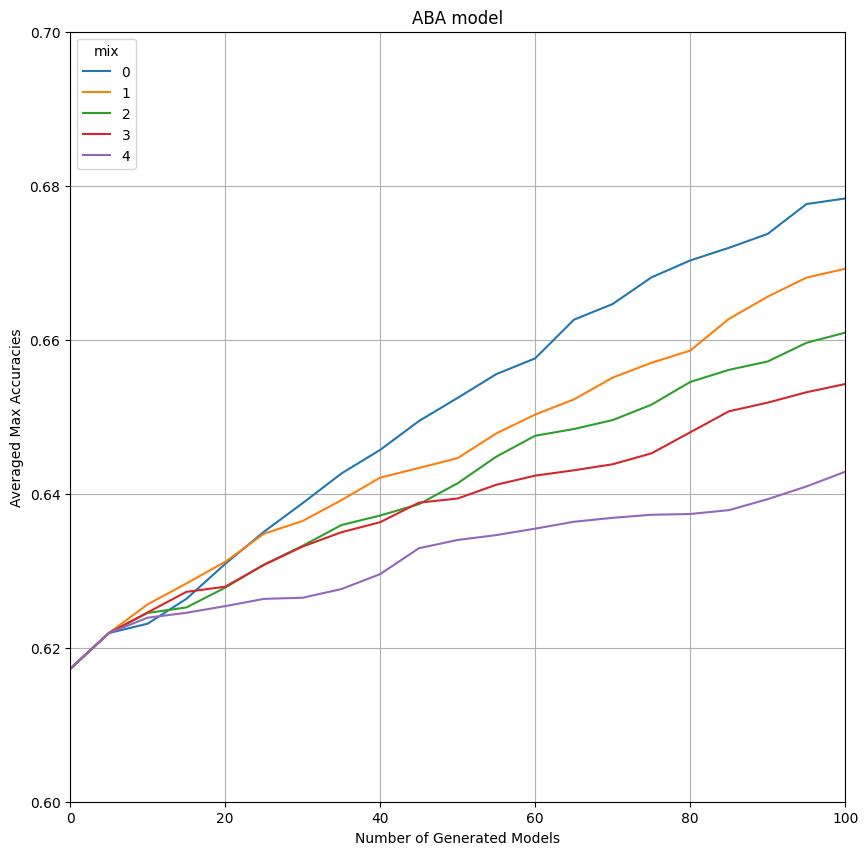

In [10]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), aba_iter.iloc[0,5:106], label="0", color = "C0")
ax1.plot(range(101), aba_iter.iloc[1,5:106], label="1", color = "C1")
ax1.plot(range(101), aba_iter.iloc[2,5:106], label="2", color = "C2")
ax1.plot(range(101), aba_iter.iloc[3,5:106], label="3", color = "C3")
ax1.plot(range(101), aba_iter.iloc[4,5:106], label="4", color = "C4")

ax1.legend(title="mix", loc="upper left")
ax1.grid()
ax1.set_xlim(00, 100)
ax1.set_ylim(0.6, 0.7)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("ABA model")

plt.show()